In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
demograpgics = pd.read_csv('datasets/exam-1/demographics.csv')
cc = pd.read_csv('datasets/exam-1/cc.csv')
cc.sort_values(by=['cc_no', 'pos_dt'], inplace=True)
kplus = pd.read_csv('datasets/exam-1/kplus.csv')
kplus.sort_values(by=['id', 'sunday'], inplace=True)
train_set = pd.read_csv('datasets/exam-1/train.csv')
test_set = pd.read_csv('datasets/exam-1/test.csv')

In [14]:
demograpgics.head()

,id,cc_no,gender,ocp_cd,age
0,1,1,2,9.0,5
1,1,98397,2,9.0,5
2,2,2,2,3.0,4
3,2,9740,2,3.0,4
4,3,3,2,1.0,3


In [15]:
cc.head(20)

,cc_no,pos_dt,cc_txn_amt
30680,2,2018-03-10,800
30684,2,2018-03-12,3800
30685,2,2018-04-27,14700
30687,2,2018-04-29,4000
30682,2,2018-05-07,800
30681,2,2018-05-14,800
30686,2,2018-06-04,1000
30683,2,2018-06-11,1000
947320,4,2018-05-11,20000
947338,4,2018-05-11,30000


In [16]:
kplus.head(20)

,id,sunday,kp_txn_count,kp_txn_amt
822506,1,2018-06-03,1,1500
822505,1,2018-06-17,1,2000
100625,2,2018-01-07,2,600
100629,2,2018-01-14,3,3200
100641,2,2018-01-21,2,600
100644,2,2018-01-28,6,3000
100643,2,2018-02-04,4,13700
100627,2,2018-02-11,5,3500
100631,2,2018-02-18,5,2100
100633,2,2018-02-25,1,300


In [17]:
train_set.head()

,id,income
0,1,20000
1,2,106000
2,3,29000
3,4,61000
4,5,18000


In [18]:
test_set.head()

,id
0,50001
1,50002
2,50003
3,50004
4,50005


In [19]:
cc_with_id = pd.merge(cc, demograpgics[['id', 'cc_no']], on='cc_no')
cc_with_id.head()

,cc_no,pos_dt,cc_txn_amt,id
0,2,2018-03-10,800,2
1,2,2018-03-12,3800,2
2,2,2018-04-27,14700,2
3,2,2018-04-29,4000,2
4,2,2018-05-07,800,2


In [20]:
cc_with_id.groupby(['id'])['cc_txn_amt'].count().describe()

count    51467.000000
mean        19.412692
std         26.209876
min          1.000000
25%          4.000000
50%         10.000000
75%         25.000000
max        754.000000
Name: cc_txn_amt, dtype: float64

        id  income
6075  6076   40000


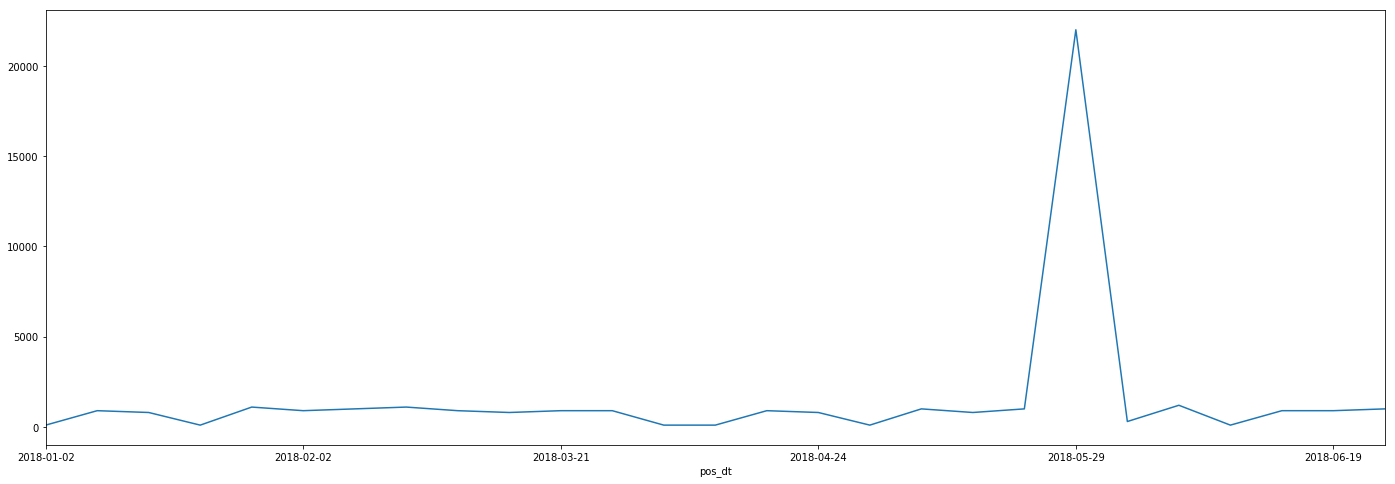

In [21]:
person = train_set.sample(1)
print(person)
cc_with_id[cc_with_id['id'] == person['id'].values[0]].groupby('pos_dt')['cc_txn_amt'].sum().plot(figsize=(24,8))

In [22]:
n_transaction_threshold = 8
train_kplus = kplus[kplus['id'] <= 50000]
grouped = train_kplus.groupby('id')
trainable_ids = grouped.size().keys()[grouped.size() >= n_transaction_threshold]
train_kplus = train_kplus[train_kplus['id'].isin(trainable_ids)]

In [23]:
train_kplus.head()

,id,sunday,kp_txn_count,kp_txn_amt
100625,2,2018-01-07,2,600
100629,2,2018-01-14,3,3200
100641,2,2018-01-21,2,600
100644,2,2018-01-28,6,3000
100643,2,2018-02-04,4,13700


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
standardizer = StandardScaler()
train_kplus[['kp_txn_count', 'kp_txn_amt']] = standardizer.fit_transform(train_kplus[['kp_txn_count', 'kp_txn_amt']])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
pca = PCA(n_components=1)
train_kplus['count_amt_pca'] = pca.fit_transform(train_kplus[['kp_txn_count', 'kp_txn_amt']])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
train_kplus.head()

,id,sunday,kp_txn_count,kp_txn_amt,count_amt_pca
100625,2,2018-01-07,-0.407708,-0.212274,-0.438394
100629,2,2018-01-14,-0.241733,-0.193170,-0.307523
100641,2,2018-01-21,-0.407708,-0.212274,-0.438394
100644,2,2018-01-28,0.256193,-0.194640,0.043525
100643,2,2018-02-04,-0.075757,-0.116020,-0.135607


In [54]:
id_grouped = train_kplus.groupby('id')
accept_ids = pd.Series(list(id_grouped.groups.keys()))
xs = id_grouped.apply(lambda row: row['kp_txn_amt'].to_numpy()).to_numpy()

ys = train_set[train_set['id'].isin(accept_ids)]['income'].to_numpy()
income_mean = train_set['income'].mean()
income_std = train_set['income'].std()
ys = (ys - income_mean) / income_std
# ys = StandardScaler().fit_transform(np.expand_dims(ys, axis=0))

In [57]:
xs[0]

array([-0.21227422, -0.19317025, -0.21227422, -0.19463978, -0.11601958,
       -0.19096594, -0.2012527 , -0.21447853, -0.07340302, -0.19243548,
       -0.21227422, -0.21594806, -0.03886891, -0.18288349, -0.19096594,
       -0.18582256, -0.01903017, -0.06532057, -0.20566131, -0.20860038,
       -0.20419177, -0.01315202, -0.20492654, -0.20492654,  0.07942878])

In [31]:
ys

array([ 1.09051812, -0.35601812,  0.2451398 , ..., -0.20572864,
       -0.54387997, -0.65659708])

In [47]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.optimizers import Adam
from tqdm import tqdm, trange, tnrange




loss:0.242 | acc:0.0 :  19%|█▉        | 6543/34657 [02:37<11:17, 41.47it/s]

In [58]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(None,1)))
model.add(LSTM(128, ))
model.add(Dense(128, activation='linear'))
model.add(Dense(1, activation='linear'))

In [59]:
opt = Adam()

In [60]:
model.compile(loss='mse', optimizer=opt, metrics=['acc'] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 128)         66560     
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 214,785
Trainable params: 214,785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
metrics = []
pbar = tnrange(len(xs))
for i in pbar:
    x, y = xs[i], ys[i]
    x = np.expand_dims(x, axis=2)
    x = np.expand_dims(x, axis=0)
    y = np.expand_dims(y, axis=0)
    metric = model.train_on_batch(x, y)
    loss, acc = metric
    metrics.append(metric)
    if i % (len(xs) // 1000) == 0:
        pbar.set_postfix_str(f'acc:{str(acc)[:5]} | loss:{str(loss)} |  ')
metrics = np.array(metrics)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


In [62]:
metrics.mean(axis=0)

array([0.8258442, 0.       ], dtype=float32)